In [1]:
import webMining as wm
from IPython.core.display import display, HTML
from tabulate import tabulate
from matplotlib import pyplot as plt
import requests
import numpy as np

Retrieve HTML document

In [2]:
query = 'rtx+2080+ti'
url = 'https://www.google.com/search?nord=1&tbm=shop&sxsrf=ALeKk021SiG0jK8P5QFwMwEqTTzTaLSJzw%3A1592931029540&source=hp&ei=1TLyXsOJHpqj5OUPhpau4A0&q='+query+'&oq='+query+'&gs_lcp=Cgtwcm9kdWN0cy1jYxADMgQIIxAnMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAOgcIIxDqAhAnUNcxWKk3YLY9aAFwAHgAgAFyiAHhBpIBAzAuOJgBAKABAaoBD3Byb2R1Y3RzLWNjLXdperABCg&sclient=products-cc&ved=0ahUKEwiDyKjBspjqAhWaEbkGHQaLC9wQ4dUDCAc&uact=5' 
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://www.google.com/',
    'Connection': 'keep-alive',
    'Cookie': 'CGIC=Ikp0ZXh0L2h0bWwsYXBwbGljYXRpb24veGh0bWwreG1sLGFwcGxpY2F0aW9uL3htbDtxPTAuOSxpbWFnZS93ZWJwLCovKjtxPTAuOA; NID=204=g5k0DQlZKLTdLr2eD81V0cBic7FoycSof8bAgCMupaGwWO-cn-aDp4NUCNcHkvob_dhAbeN494eviqwrSCfwhQDQq_d-K4HTG-YNx2lF8KG8VIk6Yo2a7c3Pw5HotilTZgFSU8VD0uKVW8AV690h73WIiDIcfNVwDYelsvHet_n3khOjpi6XfQl0CObNAEM_f8Hm7OwWc6un1hNiaTSC2W__Y9roxCVOUOpPGvAiQgoBNL2k5G_H51ZyUiTKZRsH4QUu-MOLeMLsUtr5jwUVhZbGX4xfCzos-5uBgg; SID=xQcO_AUE9k37wpaevy5EK5x-zYouKXZoIrNPNOUA6FRikzN8XkHxgCwnV5Fzza3RX_3U_Q.; HSID=AmrflQdOkBZnypTpP; SSID=AnGRjrMyz8shzmiN-; APISID=gikUssmL2DgWeE-G/AGmE_sScY4sR1j7Gi; SAPISID=rEtgdwZ7oEheKA_J/AnzdQ-CXLl9P_DRxl; ANID=AHWqTUmOvuytiAZ-RiEMDbSXk1liOmiVXsC3K6j8wTAEsxXncb8Naetqd35RHH5u; SIDCC=AJi4QfH7YFZXPoNzhwKuKu3wXev3h6HvD9qbfqDB0-6PoOq2RkwFgUHu3oxgm8LCqqtm7aWDH_-J; SEARCH_SAMESITE=CgQI_48B; __Secure-3PSID=xQcO_AUE9k37wpaevy5EK5x-zYouKXZoIrNPNOUA6FRikzN8DoN4DUANadKjm3gWjbWkKQ.; __Secure-3PAPISID=rEtgdwZ7oEheKA_J/AnzdQ-CXLl9P_DRxl; __Secure-HSID=AmrflQdOkBZnypTpP; __Secure-SSID=AnGRjrMyz8shzmiN-; __Secure-APISID=gikUssmL2DgWeE-G/AGmE_sScY4sR1j7Gi; 1P_JAR=2020-06-23-16; OTZ=5502067_68_64_73560_68_416340; DV=k7tykpHOCQdJUOnslcXBzjs-r2ohLheAAP7r7W9LEAYAANDMM2lHtAn8AAIAAJSWJz2C-gppkwAAAA',
    'Upgrade-Insecure-Requests': '1',
    'TE': 'Trailers'}
#payload = ''
#response = requests.post(url, data=payload, headers=headers)
response = requests.get(url, headers=headers)

Instantiate DOM tree and extractor

In [5]:
doc = wm.DOM('test.html')
#f = open('test.html', 'w')
#f.write(response.text)
#f.close()
#doc = wm.DOM(url, response.text)
dsre = wm.DSRE()

Extract

In [6]:
#dsre.setUseFourier(False)
dsre.extract(doc)

Iterate over the extracted regions:
    - content: True/False;
    - sequence: region's subsequence;
    - transform: region's Fourier Transform;
    - table: extracted records (rows x cols);
    - rows: number of records.

In [7]:
regions = []
for reg in range(0, dsre.regionCount()):
    region = dict()
    dr = dsre.getDataRegion(reg)
    region['content'] = dr.isContent()
    region['sequence'] = dr.getSequence()
    region['transform'] = dr.getTransform()
    region['table'] = dr.getTable()
    region['rows'] = len(region['table'])
    regions.append(region)

Displays a table with the results of each region

In [8]:
content_string = ['noise', 'content']
for i, region in enumerate(regions):
    display('Region #' + str(i) + ' - ' + content_string[region['content']] + ', ' + str(region['rows']) + ' records')
    display(tabulate(region['table'], tablefmt='html'))

'Region #0 - content, 20 records'

"Placa de Vídeo Gigabyte NVIDIA GeForce RTX 2080 Ti WindForce 11GB, GDDR6 - GV-N208TWF3-11GC","R$ 8.099,90.","R$ 8.099,90",KaBuM!,Dê ao seu sistema o desempenho gráfico que ele merece com a,. O sistema de resfriamento WINDFORCE que compõe a ...,·,·,Outubro de 2018,GIGABYTE,ASUS,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_17711394298758366501_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",93%,positivos,(395),,1.408 comentários sobre o produto,·,·,·,·,·,·,·,,RTX 2080 Ti,,PCI Express,DisplayPort,DVI,HDMI,GDDR,11 GB,Placa gráfica,
"Placa de Vídeo Externa Gaming Box Aorus NVIDIA GeForce RTX 2080 Ti, 11GB, GDDR6 - GV-N208TIXEB-11GC","R$ 10.779,90.","R$ 10.779,90",KaBuM!,Powered by GIGABYTE Geforce,"graphics card, AORUS",Gaming Box transfers the Ultrabook laptop PC into a ...,·,Outubro de 2019,ASUS,ASUS,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_17772422326010779112_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",93%,positivos,(395),,1.408 comentários sobre o produto,·,·,·,·,·,·,,,RTX 2080 Ti,RTX 2080 Ti,300 mm de comprimento,DisplayPort,HDMI,GDDR,11 GB,,,
"Placa de Vídeo Gigabyte Aorus NVIDIA GeForce RTX 2080 Ti Xtreme 11G, GDDR6 - GV-N208TAORUS X-11GC","R$ 8.999,90.","R$ 8.999,90",KaBuM!,AORUS fornece a solução de refrigeração completa para todos os principais componentes da placa gráfica.,·,·,·,Outubro de 2018,GIGABYTE,GIGABYTE,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_14860149008765637242_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",93%,positivos,(395),,899 comentários sobre o produto,·,·,·,·,·,·,,,,,PCI Express,DisplayPort,VGA,HDMI,GDDR,11 GB,Placa gráfica,
"Placa de Vídeo Zotac NVIDIA GeForce RTX 2080 Super Twin Fan, 8GB, GDDR6 - ZT-T20820F-10P","R$ 4.699,90.","R$ 4.699,90",KaBuM!,Tudo é excelente com as novas placas gráficas ZOTAC Gaming GeForce,20 Series Super. Baseado na arquitetura NVIDIA Turing ...,·,·,ZOTAC,MSI,Placa gráfica,,93%,positivos,(395),,1.591 comentários sobre o produto,·,·,·,·,·,·,·,,RTX,,PCI Express,DisplayPort,DVI,VGA,HDMI,GDDR,8 GB,"<img class=TL92Hc c16 data-deferred=1 id=srpresultimg_8604921646714500851_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />"
"Placa de Vídeo PNY NVIDIA GeForce RTX 2080 Ti Blower, 11GB, GDDR6 - VCG2080T11BLPPB","R$ 7.934,90.","R$ 7.934,90",KaBuM!,·,·,·,·,ASUS,ASUS,Placa gráfica,"<img class=TL92Hc c18 data-deferred=1 id=srpresultimg_2661393170450619778_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",93%,positivos,(395),,1.408 comentários sobre o produto,,,,,,,,,,,GDDR,11 GB,,,,,,
"Placa de Vídeo Aorus NVIDIA GeForce RTX 2080 Super Waterforce, 8GB, GDDR6 - GV-N208SAORUS W-8GC","R$ 5.848,90.","R$ 5.848,90",KaBuM!,AORUS provides the all-around cooling solution for all key components of the graphics card. GIGABYTE takes care not only GPU ...,·,·,·,Agosto de 2019,GIGABYTE,ASUS,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_17047332292187175672_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",93%,positivos,(395),,1.074 comentários sobre o produto,·,·,·,·,·,·,,,,,4096 x 2160,PCI Express,DisplayPort,HDMI,GDDR,8 GB,Placa gráfica,
"Placa de Vídeo EVGA NVIDIA GeForce RTX 2080 TI FTW3 Ultra Overclocked 65C Gaming, 11GB, GDDR6 - 11G-P4-2487-KR","R$ 9.799,90.","R$ 9.799,90",KaBuM!,As placas gráficas EVGA GeForce,da série 20 são equipadas com a nova arquitetura NVIDIA Turing para oferecer novos níveis ...,·,·,Outubro de 2018,ASUS,ASUS,,93%,positivos,(395),,1.408 comentários sobre o produto,·,·,·,·,·,·,·,,RTX,,PCI Express,DisplayPort,DVI,HDMI,GDDR,11 GB,Placa gráfica,"<img class=TL92Hc c19 data-deferred=1 id=srpresultimg_1017311173285275412_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />"
Placa de Vídeo Gainward GeForce RTX 2080ti 11GB GDDR6 Pho

'Region #1 - noise, 8 records'

Categoria,Notebooks gamer,Computadores desktop para games,Computadores desktop de torre,Placas de vídeo,,,
Memória de vídeo,24 – 48 GB,8 – 24 GB,até 8 GB,,,,
Processador gráfico,NVIDIA,GALAX,EVGA,Colorful,MSI,GIGABYTE,ASUS
Fabricante,ZOTAC,PNY,MSI,EVGA,ASUS,GIGABYTE,
Saída,VGA,DVI,DisplayPort,HDMI,,,
Comprimento,acima de 280 mm,170 – 280 mm,100 – 170 mm,até 100 mm,,,
Condição,Itens usados,Itens novos,,,,,
Vendedor,,,,,,,


'Region #2 - noise, 11 records'

"<img alt=ASUS data-deferred=1 id=vrefimg_0_0_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",ASUS,
"<img alt=GIGABYTE data-deferred=1 id=vrefimg_0_1_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",GIGABYTE,
"<img alt=MSI data-deferred=1 id=vrefimg_0_2_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",MSI,
"<img alt=Colorful data-deferred=1 id=vrefimg_0_3_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Colorful,
"<img alt=EVGA data-deferred=1 id=vrefimg_0_4_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",EVGA,
"<img alt=GALAX data-deferred=1 id=vrefimg_0_5_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",GALAX,
"<img alt=NVIDIA data-deferred=1 id=vrefimg_0_6_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",NVIDIA,Filtrar por Saída
"<img alt=HDMI data-deferred=1 id=vrefimg_1_0_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",HDMI,
"<img alt=DisplayPort data-deferred=1 id=vrefimg_1_1_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",DisplayPort,
"<img alt=DVI data-deferred=1 id=vrefimg_1_2_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",DVI,
"<img alt=VGA data-deferred=1 id=vrefimg_1_3_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",VGA,


Plot the sequence of the document and the subsequence+transform of each region

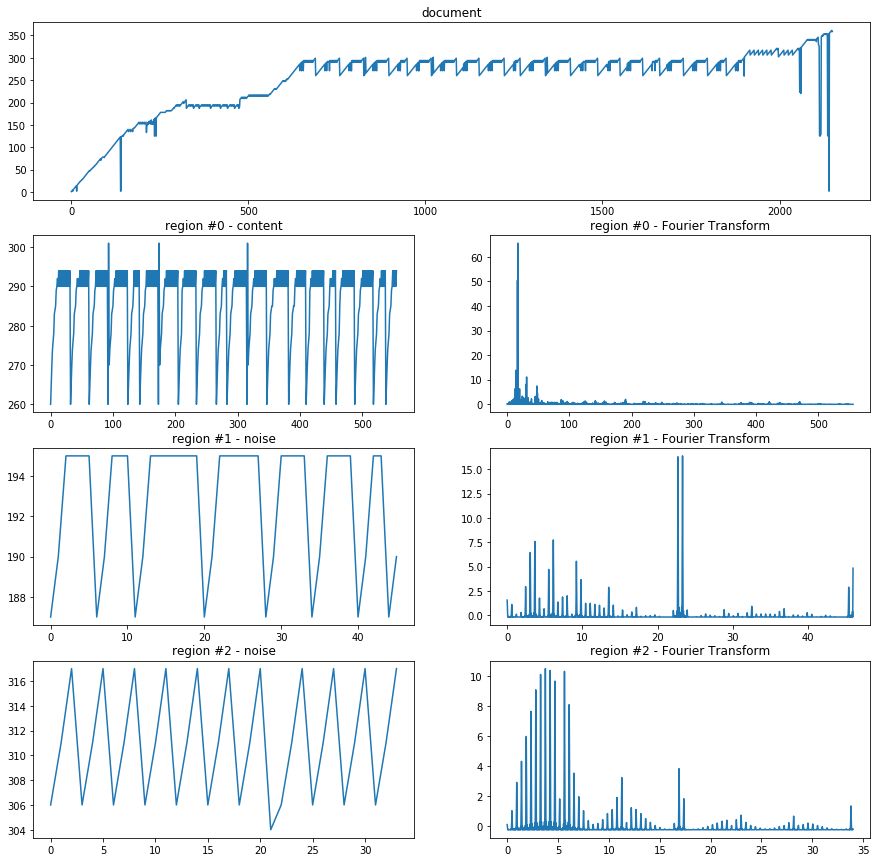

In [9]:
rows = len(regions) + 1
plt.figure(figsize=(15,15))
plt.subplot(rows, 1, 1)
plt.title('document')
plt.plot(dsre.getSequence())
for i, region in enumerate(regions):
    plt.subplot(rows, 2, (i+1)*2 + 1)
    plt.title('region #' + str(i) + ' - ' + content_string[region['content']])
    plt.plot(region['sequence'])
    plt.subplot(rows, 2, (i+1)*2 + 2)
    plt.title('region #' + str(i) + ' - Fourier Transform')
    transform_len = len(region['transform'])//2
    plt.plot(
        np.linspace(0, len(region['sequence']), transform_len), 
        region['transform'][0:transform_len])